## Step 1: Initial Data Load and Inspection

#### 1. Load the dataset

In [9]:
# Load the dataset
import pandas as pd
df = pd.read_csv('./Telco_Customer_Churn.csv')

#### 2. Inspect the First Few Rows

In [11]:
# Inspect the First Few Rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 3. Check Data Types and Missing Values

In [13]:
# Check Data Types and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 4. Summary Statistics

This gives us basic statistics for numerical columns, which helps understand data distributions

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Step 2: Exploratory Data Analysis (EDA)

#### 1. Convert TotalCharges to Numeric and Handle Missing Values

In [35]:
# Convert TotalCharges to numeric, and coerce any non-numeric values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Count missing values in TotalCharges (if any) and fill with median or mean
missing_total_charges = df['TotalCharges'].isna().sum()
print("Missing values in TotalCharges:", missing_total_charges)

# Fill missing values with the median of TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


Missing values in TotalCharges: 0


#### 2. Visualize Numerical Distributions

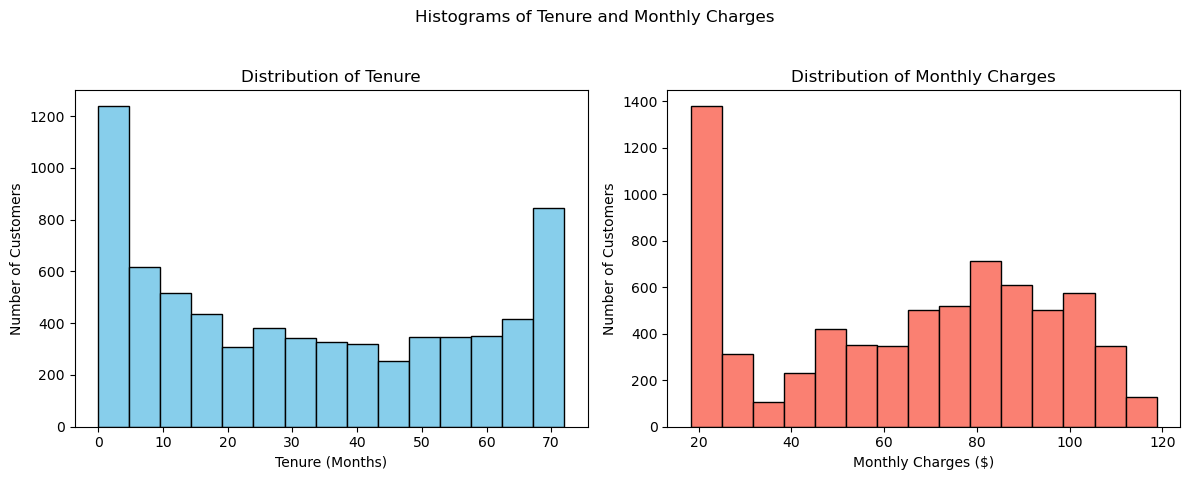

In [37]:
import matplotlib.pyplot as plt

# Plot histograms for tenure and MonthlyCharges with labels
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Tenure histogram
axes[0].hist(df['tenure'], bins=15, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Number of Customers')

# MonthlyCharges histogram
axes[1].hist(df['MonthlyCharges'], bins=15, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Monthly Charges')
axes[1].set_xlabel('Monthly Charges ($)')
axes[1].set_ylabel('Number of Customers')

plt.suptitle('Histograms of Tenure and Monthly Charges')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



#### 3. Plot Categorical Features Against Churn

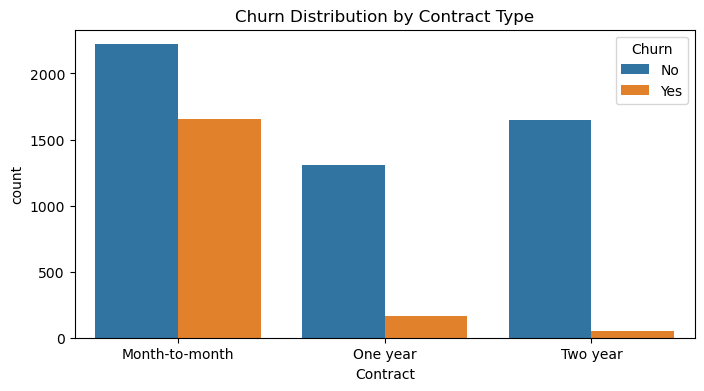

In [30]:
import seaborn as sns

# Plot for Contract type by Churn
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Distribution by Contract Type')
plt.show()


#### 4. Correlation Heatmap for Numerical Features

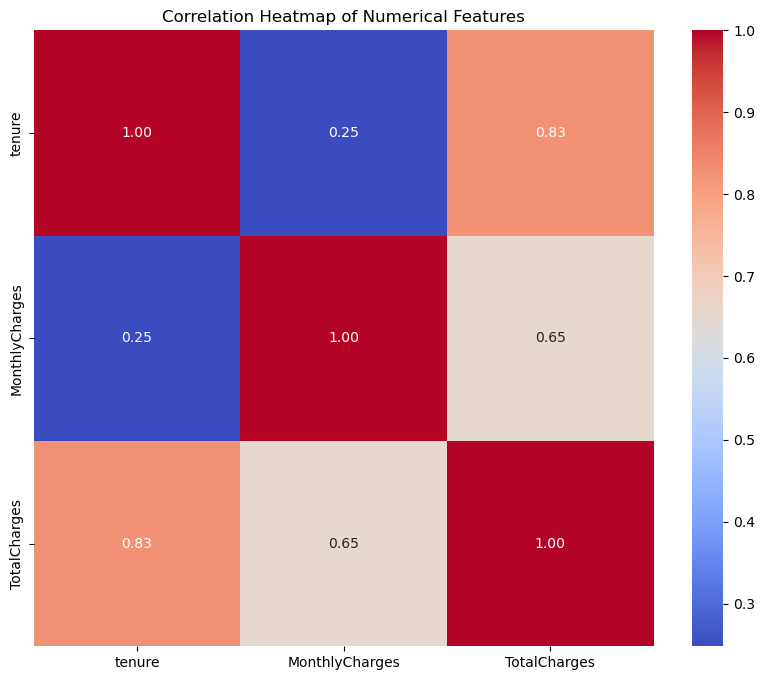

In [33]:
# Plot correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


## Extended EDA Plan

#### 1. Churn Rate by Categorical Variables

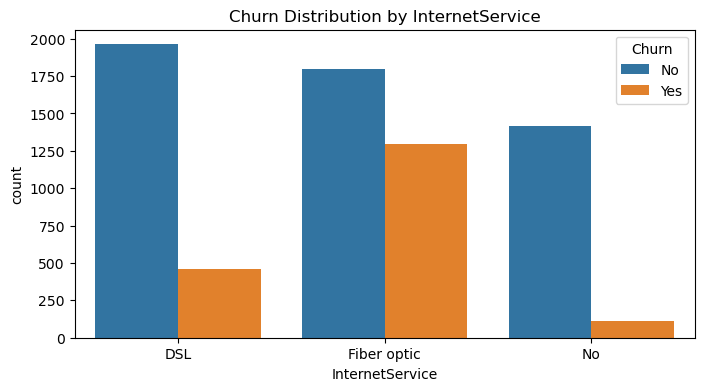

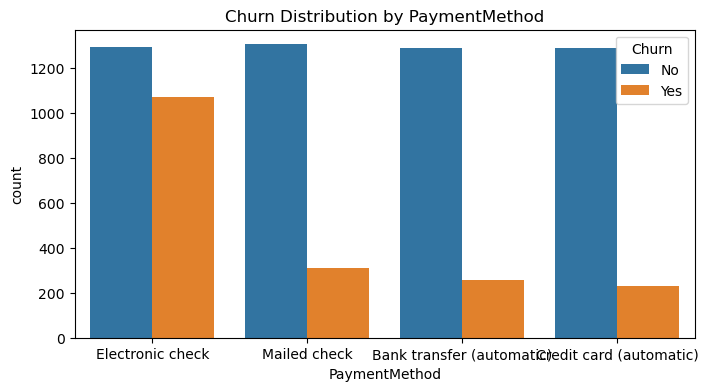

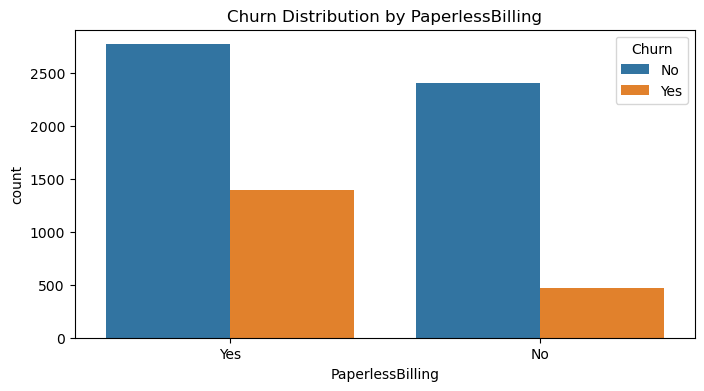

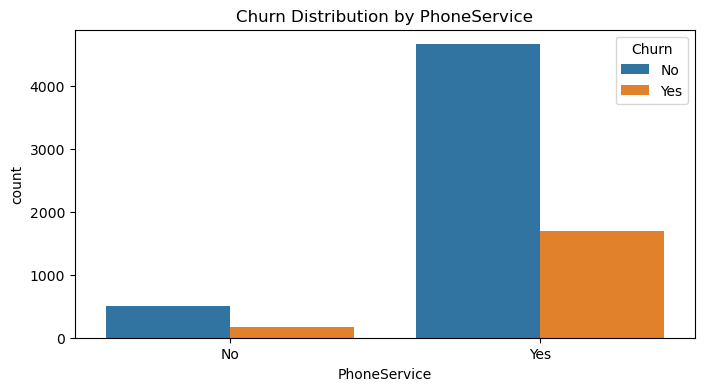

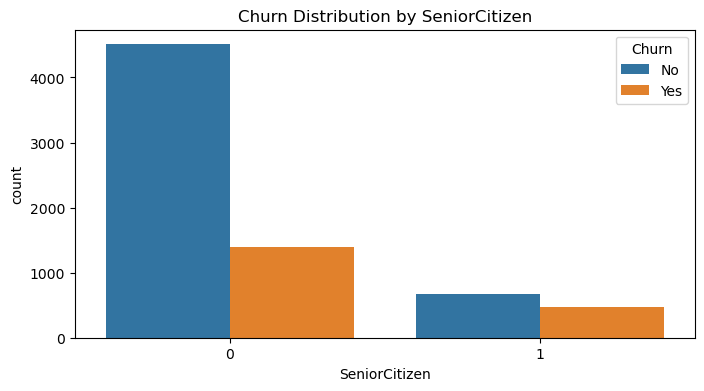

In [44]:
categorical_features = ['InternetService', 'PaymentMethod', 'PaperlessBilling', 'PhoneService', 'SeniorCitizen']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Churn Distribution by {feature}')
    plt.show()


#### 2. Numerical Feature Analysis by Churn

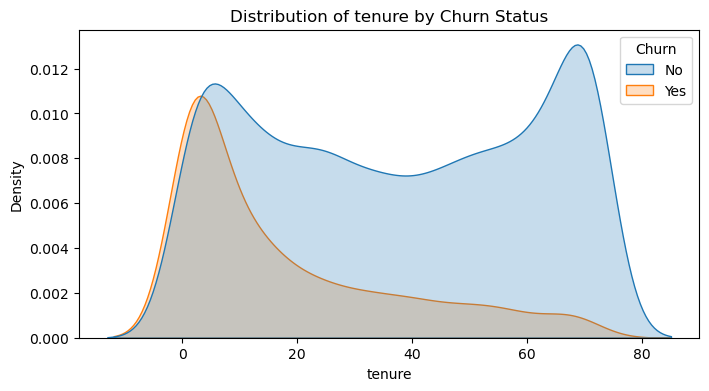

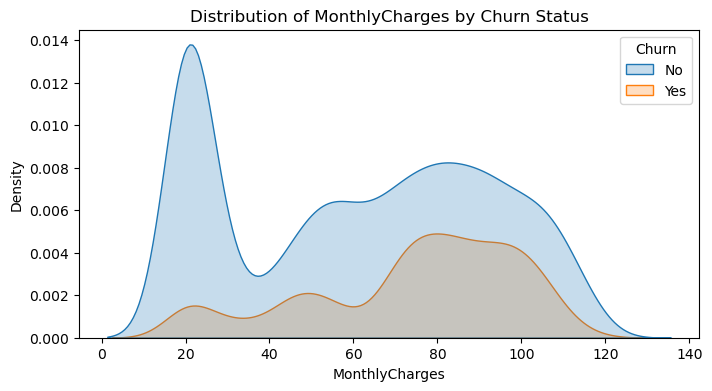

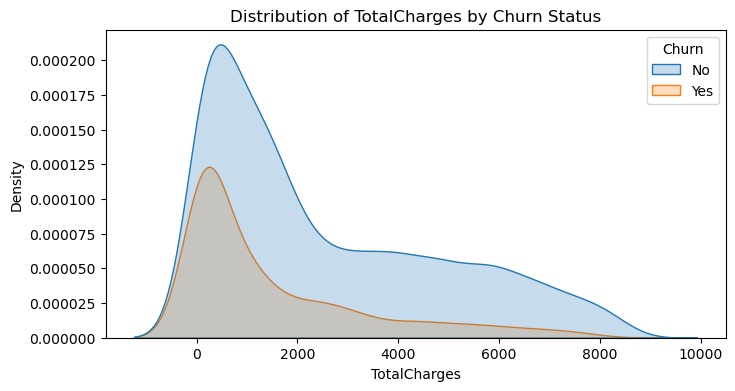

In [49]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue='Churn', fill=True)
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


#### 3. Bivariate Analysis of Key Features

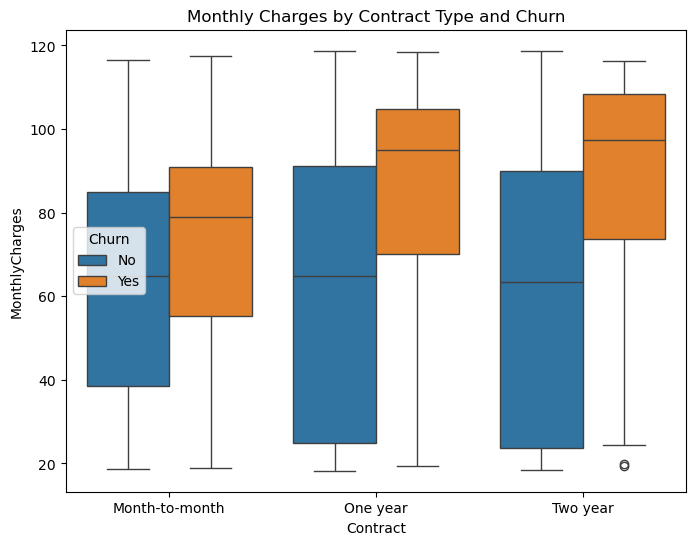

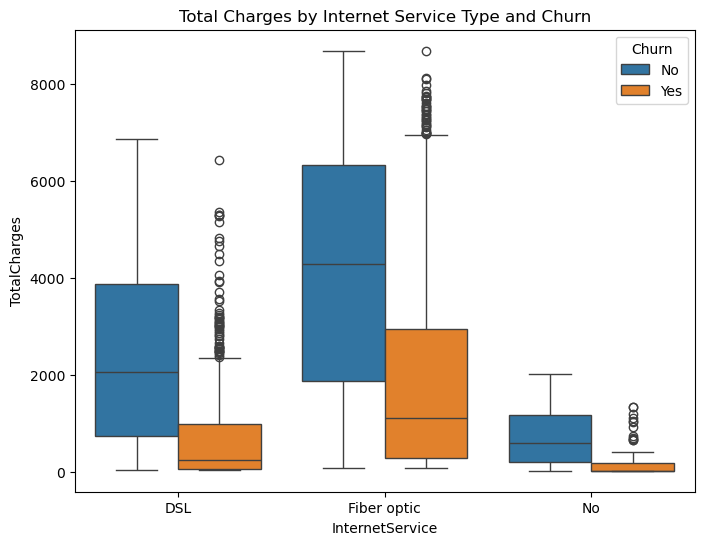

In [52]:
# Contract type vs Monthly Charges, split by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()

# Internet Service vs Total Charges, split by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='InternetService', y='TotalCharges', hue='Churn')
plt.title('Total Charges by Internet Service Type and Churn')
plt.show()


#### 4. Outlier Detection for MonthlyCharges and TotalCharges

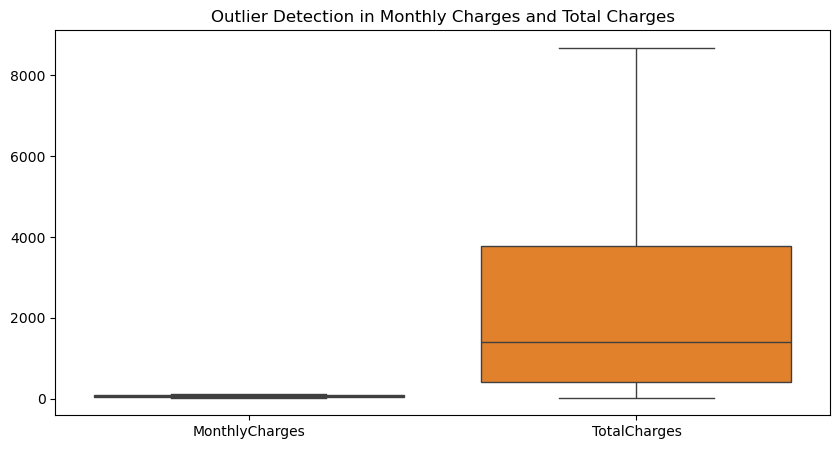

In [55]:
# Boxplots for outlier detection
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['MonthlyCharges', 'TotalCharges']])
plt.title('Outlier Detection in Monthly Charges and Total Charges')
plt.show()


#### 5. Further Correlation Analysis with Churn

In [60]:
# Ensure only numeric columns are used in correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Add the encoded Churn column to the numeric-only DataFrame
numeric_df['Churn_Encoded'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate correlations with the Churn_Encoded column
correlations_with_churn = numeric_df.corr()['Churn_Encoded'].sort_values(ascending=False)
print("Correlations with Churn:\n", correlations_with_churn)



Correlations with Churn:
 Churn_Encoded     1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn_Encoded, dtype: float64


## Step 3: Data Preprocessing

In [241]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


#### 1. Feature Selection and Engineering

In [247]:
# Create a copy of the original dataset after EDA
df_clean = df_encoded.copy()
df_clean.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_Encoded,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,customerID_9985-MWVIX,customerID_9986-BONCE,customerID_9987-LUTYD,customerID_9992-RRAMN,customerID_9992-UJOEL,customerID_9993-LHIEB,customerID_9995-HOTOH,Churn_Yes,TenureCategory_Mid,TenureCategory_Loyal
0,0,-1.277445,-1.160323,-0.994242,0,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,0.066327,-0.259629,-0.173244,0,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,-1.236724,-0.362660,-0.959674,1,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0.514251,-0.746535,-0.194766,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,1,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [249]:
# Drop irrelevant columns (e.g., customerID)
# df_clean = df_clean.drop(['customerID'], axis=1)

# Ensure the target column is separated
X = df_clean.drop('Churn_Encoded', axis=1)
y = df_clean['Churn_Encoded']

#### 2. Train-Test Split

In [252]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 3. Preprocessing Pipelines

In [258]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Verify preprocessor setup by fitting on training data only
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## Step 4: Model Training with Baseline Model

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Create a pipeline for the model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
y_pred_prob = model_pipeline.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8041163946061036
AUC-ROC: 0.8389570631527737

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



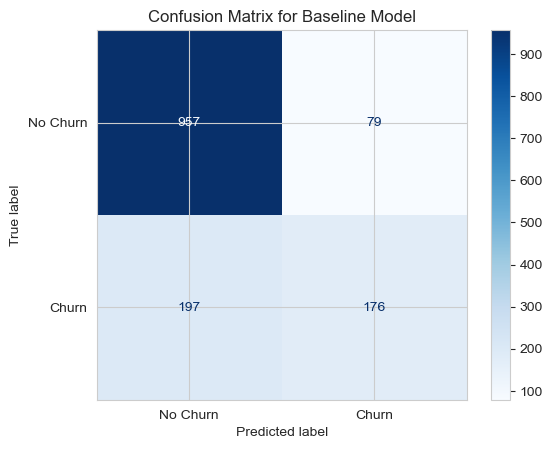

In [267]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Baseline Model')
plt.show()


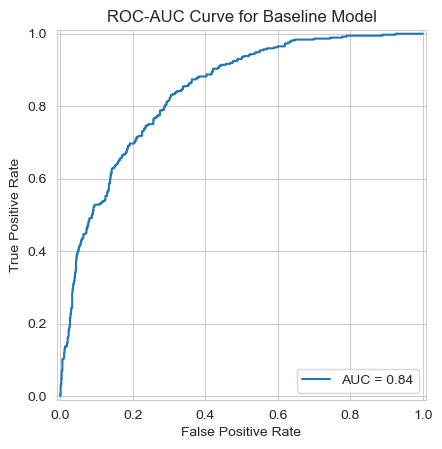

In [269]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Display the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_pred_prob))
roc_display.plot()
plt.title('ROC-AUC Curve for Baseline Model')
plt.show()


#### Step 5: Validation with Cross-Validation

Use cross-validation to ensure that the model generalizes well.

In [265]:
from sklearn.model_selection import cross_val_score

# Cross-validate the model
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.79591837 0.78970719 0.77196096 0.79769299 0.77886323]
Mean cross-validation score: 0.78682854715753
